https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np


In [ ]:
df=pd.read_csv("/content/heart.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


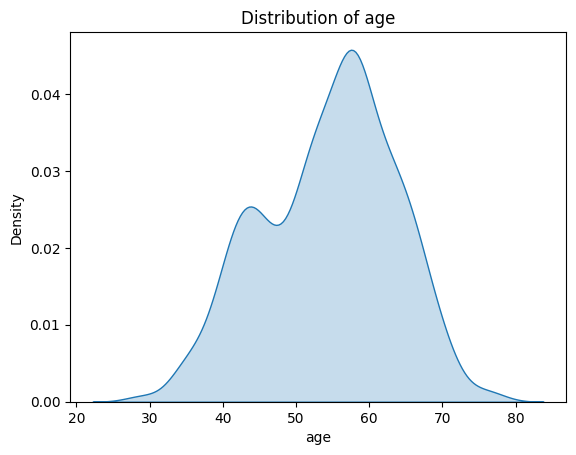

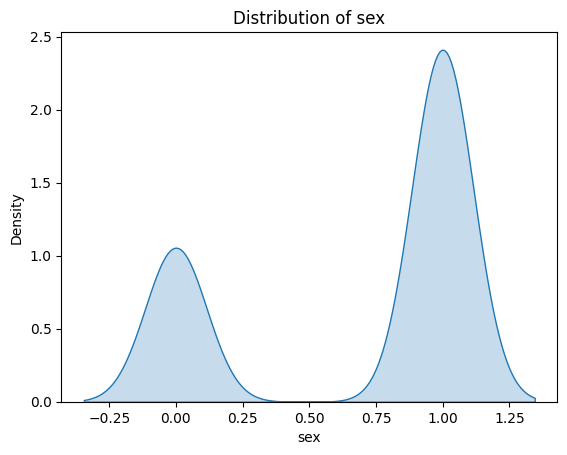

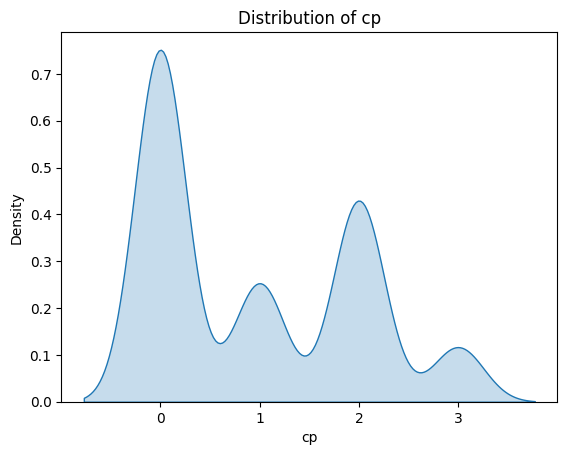

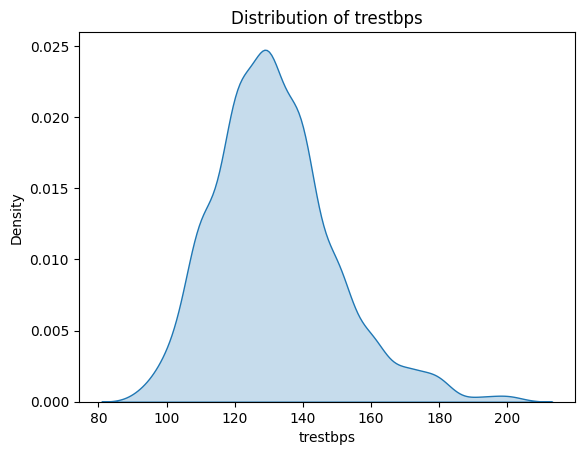

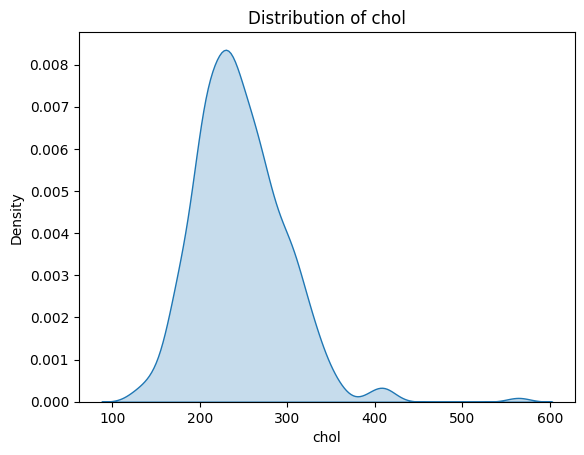

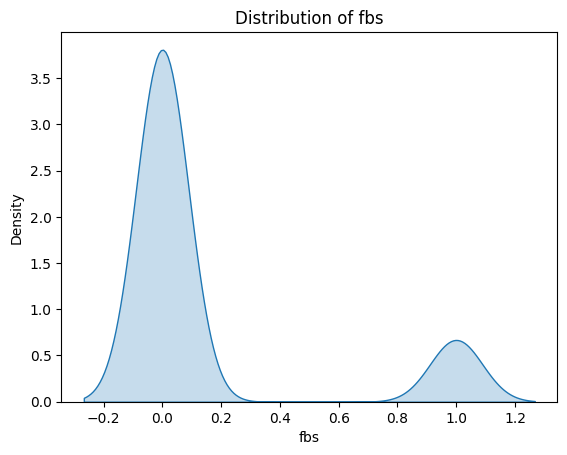

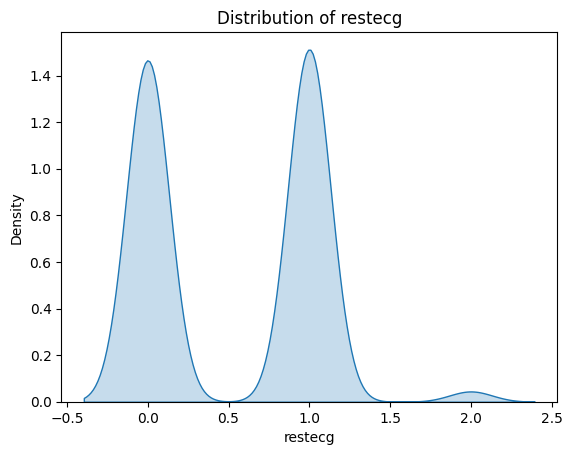

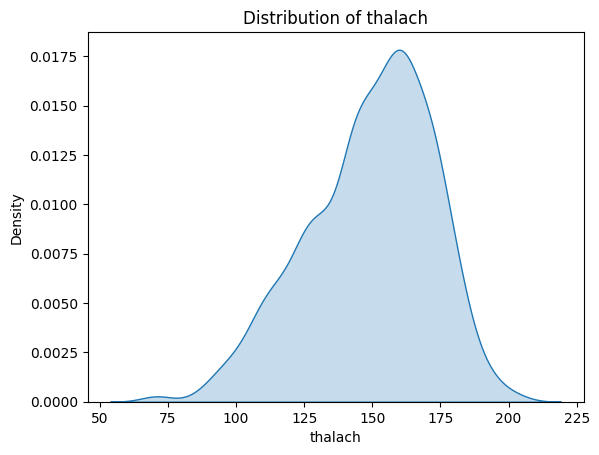

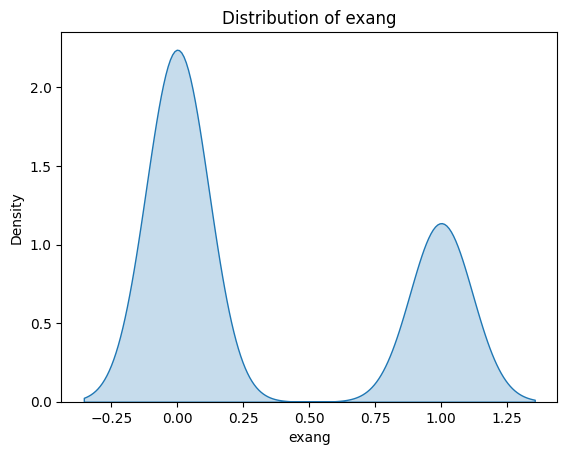

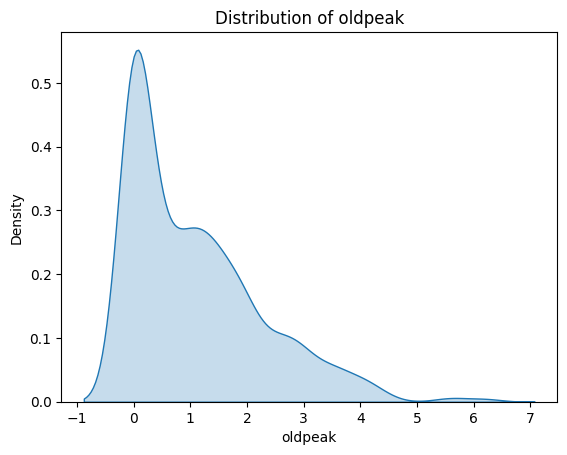

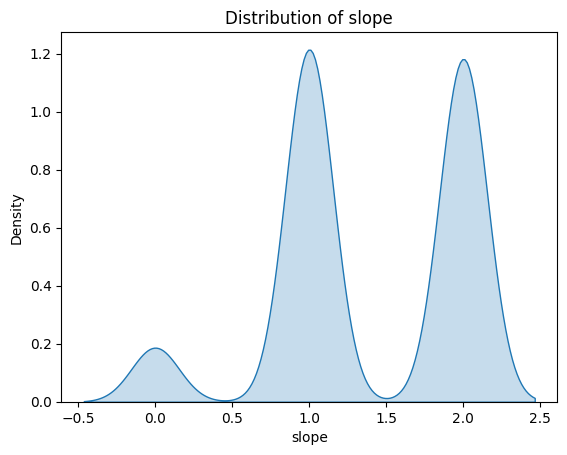

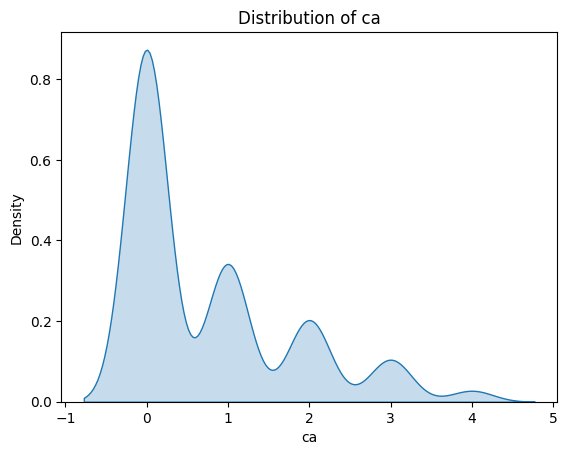

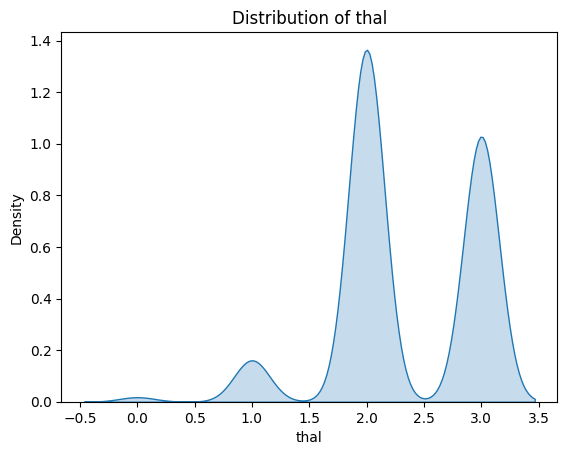

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
for col in df.columns[:-1]:  # Skip 'Classification'
    sns.kdeplot(df[col], fill=True)
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
df.skew(numeric_only=True)

# Skewness ≈ 0: Symmetric

# Skewness > 0: Right-skewed (long tail to the right)

# Skewness < 0: Left-skewed


,0
age,-0.248866
sex,-0.851449
cp,0.529455
trestbps,0.739768
chol,1.074073
fbs,1.971339
restecg,0.180440
thalach,-0.513777
exang,0.692655
oldpeak,1.210899


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


# Feature and target split
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (Linear)": SVC(kernel="linear"),
    "SVM (RBF)": SVC(kernel="rbf"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate
results = {}
for name, model in classifiers.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Optional: print sorted summary
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Performance Summary:")
for name, acc in sorted_results:
    print(f"{name}: {acc:.4f}")


Logistic Regression Accuracy: 0.7951
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205


K-Nearest Neighbors Accuracy: 0.8341
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205


SVM (Linear) Accuracy: 0.8146
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       102
           1       0.76      0.92      0.83       103

    accuracy                           0.81       205
   macro avg       0.

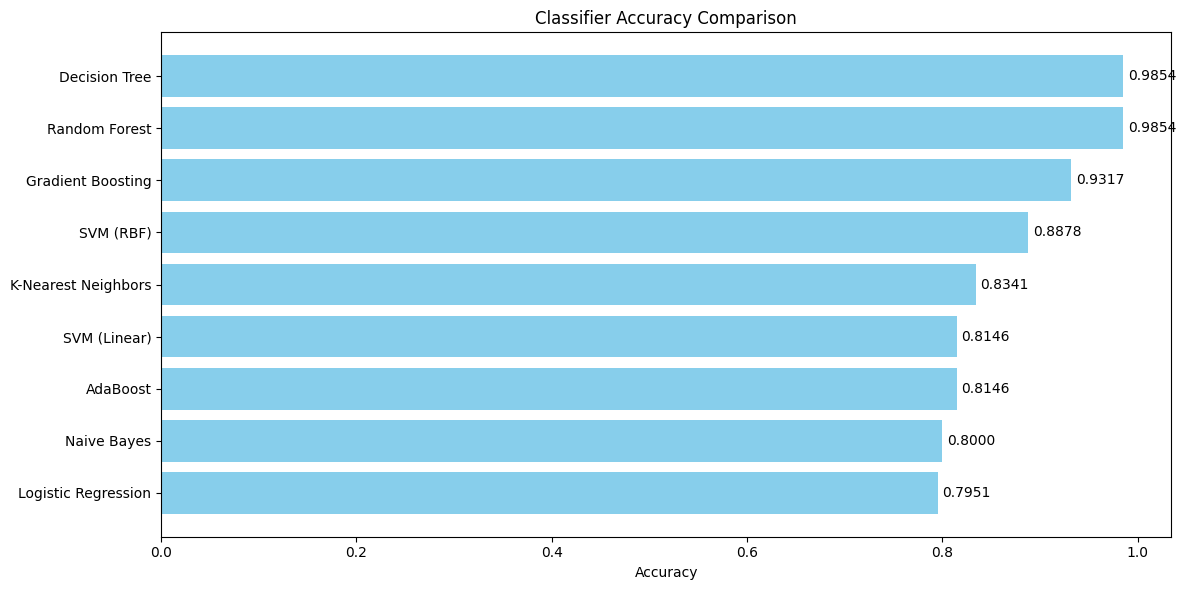

In [ ]:
import matplotlib.pyplot as plt

# Sort results by accuracy for better visualization
sorted_results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(list(sorted_results.keys()), list(sorted_results.values()), color='skyblue')
plt.xlabel("Accuracy")
plt.title("Classifier Accuracy Comparison")
plt.gca().invert_yaxis()  # Highest accuracy on top
for i, (name, acc) in enumerate(sorted_results.items()):
    plt.text(acc + 0.005, i, f"{acc:.4f}", va='center')
plt.tight_layout()
plt.show()


In [ ]:
feature_names = X.columns
num_features = X.shape[1]

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score
# Objective function
def objective(agent, alpha=0.01):
    if np.count_nonzero(agent) == 0:
        return 1
    selected = np.where(agent == 1)[0]
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train.iloc[:, selected], y_train)
    preds = clf.predict(X_test.iloc[:, selected])
    score = f1_score(y_test, preds)
    penalty = alpha * (np.count_nonzero(agent) / len(agent))
    return 1 - score + penalty

# Transfer functions
def transfer_sigmoid(x): return 1 / (1 + np.exp(-x))
def transfer_tanh(x): return (np.tanh(x) + 1) / 2
def transfer_vshape(x): return abs(np.tanh(x))

TRANSFER_FUNCTION = 'sigmoid'  # 'sigmoid', 'tanh', 'vshape'
def transfer(x):
    return {
        'sigmoid': transfer_sigmoid,
        'tanh': transfer_tanh,
        'vshape': transfer_vshape
    }[TRANSFER_FUNCTION](x)

# Initialization
def initialization(search_agents_no, dim):
    return np.random.randint(0, 2, size=(search_agents_no, dim))

import random # Import the random module

# Roulette Wheel Selection
def roulette_wheel_selection(probabilities):
    r = random.random() # Use random.random() instead of rand()
    normalized_probs = np.array(probabilities) / np.sum(probabilities)
    cdf = np.cumsum(normalized_probs)
    return np.where(r <= cdf)[0][0]

# SCSO
def scso(objective, search_agents_no=30, max_iter=50, dim=30, alpha=0.01):
    positions = initialization(search_agents_no, dim)
    convergence_curve = np.zeros(max_iter)
    best_score = float("inf")
    best_fit = None

    for t in range(max_iter):
        for i in range(search_agents_no):
            fitness = objective(positions[i], alpha)
            if fitness < best_score:
                best_score = fitness
                best_fit = positions[i].copy()

        S = 2
        rg = S - S * t / max_iter
        r = random.random() * rg # Use random.random() instead of rand()
        R = (2 * rg) * random.random() - rg # Use random.random() instead of rand()

        for i in range(search_agents_no):
            for j in range(dim):
                teta = roulette_wheel_selection(range(360))
                if -1 <= R <= 1:
                    diff = abs(random.random() * best_fit[j] - positions[i, j]) # Use random.random() instead of rand()
                    updated = best_fit[j] - r * diff * np.cos(np.deg2rad(teta))
                else:
                    cp = int(np.floor(search_agents_no * random.random())) # Use random.random() instead of rand()
                    updated = r * (positions[cp, j] - random.random() * positions[i, j]) # Use random.random() instead of rand()

                prob = transfer(updated)
                positions[i, j] = 1 if random.random() < prob else 0 # Use random.random() instead of rand()

        convergence_curve[t] = best_score

    return best_score, best_fit, convergence_curve




Selected Feature Indexes: [ 4  7 10]
Total Selected: 3

Selected Feature Names:
- chol
- thalach
- slope

Classifier Performance on Selected Features:
Logistic Regression  | Accuracy: 0.6780 | F1 Score: 0.6827
K-Nearest Neighbors  | Accuracy: 0.7756 | F1 Score: 0.7527
SVM (Linear)         | Accuracy: 0.6829 | F1 Score: 0.6860
SVM (RBF)            | Accuracy: 0.6439 | F1 Score: 0.6667
Decision Tree        | Accuracy: 1.0000 | F1 Score: 1.0000
Random Forest        | Accuracy: 1.0000 | F1 Score: 1.0000
Gradient Boosting    | Accuracy: 0.8683 | F1 Score: 0.8744
AdaBoost             | Accuracy: 0.6976 | F1 Score: 0.7075
Naive Bayes          | Accuracy: 0.7024 | F1 Score: 0.7109


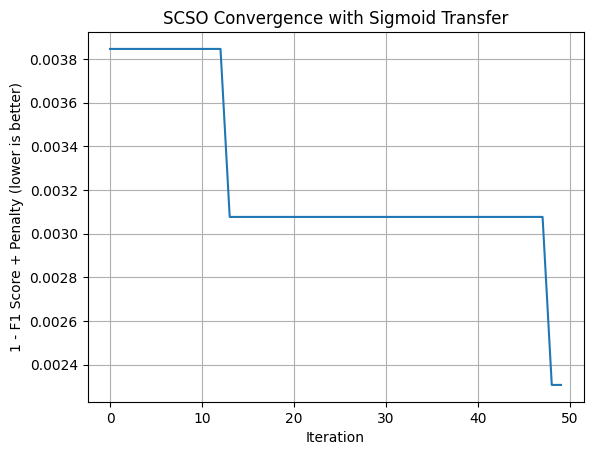

In [ ]:
# Run optimization
best_score, best_fit, convergence_curve = scso(objective, search_agents_no=30, max_iter=50, dim=num_features, alpha=0.01)


# Change the import statement
import matplotlib.pyplot as plt
# Show results
selected_idx = np.where(best_fit == 1)[0]
print("\nSelected Feature Indexes:", selected_idx)
print("Total Selected:", len(selected_idx))
print("\nSelected Feature Names:")
for idx in selected_idx:
    print("-", feature_names[idx])

# Evaluate on multiple classifiers
print("\nClassifier Performance on Selected Features:")
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM (Linear)": SVC(kernel="linear"),
    "SVM (RBF)": SVC(kernel="rbf"),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train.iloc[:, selected_idx], y_train)
    preds = model.predict(X_test.iloc[:, selected_idx])
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    print(f"{name:20s} | Accuracy: {acc:.4f} | F1 Score: {f1:.4f}")

# Plot convergence
plt.plot(convergence_curve)
plt.xlabel("Iteration")
plt.ylabel("1 - F1 Score + Penalty (lower is better)")
plt.title(f"SCSO Convergence with {TRANSFER_FUNCTION.capitalize()} Transfer")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming: objective, feature_names, num_features are already defined

# Store results here
scso_results = []

# Run SCSO 10 times
for run in range(1, 11):
    print(f"\nRunning SCSO - Round {run}")

    best_score, best_fit, convergence_curve = scso(
        objective, search_agents_no=30, max_iter=50, dim=num_features, alpha=0.01
    )

    selected_idx = np.where(best_fit == 1)[0]
    selected_features = [feature_names[i] for i in selected_idx]

    scso_results.append({
        "Round": run,
        "Selected Indexes": selected_idx.tolist(),
        "Selected Features": selected_features,
        "Best Accuracy": 1 - best_score  # Assuming lower objective = higher accuracy
    })

    print(f"Round {run} - Best Accuracy: {1 - best_score:.4f}")
    print("Selected Features:", selected_features)

# Convert to DataFrame
scso_df = pd.DataFrame(scso_results)

# Display summary
print("\nSummary of 10 SCSO Rounds:")
print(scso_df)

# Optional: save results to CSV
scso_df.to_csv("scso_10_rounds_results.csv", index=False)



Running SCSO - Round 1
Round 1 - Best Accuracy: 0.9969
Selected Features: ['sex', 'chol', 'thalach', 'exang']

Running SCSO - Round 2
Round 2 - Best Accuracy: 0.9977
Selected Features: ['age', 'chol', 'thalach']

Running SCSO - Round 3
Round 3 - Best Accuracy: 0.9969
Selected Features: ['trestbps', 'thalach', 'slope', 'thal']

Running SCSO - Round 4
Round 4 - Best Accuracy: 0.9969
Selected Features: ['age', 'sex', 'chol', 'thal']

Running SCSO - Round 5
Round 5 - Best Accuracy: 0.9977
Selected Features: ['chol', 'restecg', 'thalach']

Running SCSO - Round 6
Round 6 - Best Accuracy: 0.9969
Selected Features: ['sex', 'thalach', 'oldpeak', 'ca']

Running SCSO - Round 7
Round 7 - Best Accuracy: 0.9977
Selected Features: ['sex', 'chol', 'thalach']

Running SCSO - Round 8
Round 8 - Best Accuracy: 0.9969
Selected Features: ['chol', 'thalach', 'oldpeak', 'slope']

Running SCSO - Round 9
Round 9 - Best Accuracy: 0.9969
Selected Features: ['trestbps', 'chol', 'thalach', 'slope']

Running SCSO -

In [ ]:
from collections import Counter

# Flatten all selected features across all rounds
all_scso_selected = sum(scso_df["Selected Features"], [])

# Count frequency
scso_feature_counts = Counter(all_scso_selected)

# Convert to DataFrame
scso_feature_freq_df = pd.DataFrame(scso_feature_counts.items(), columns=["Feature", "Count"])
scso_feature_freq_df = scso_feature_freq_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

print("\nFeature Selection Frequency Across 10 SCSO Rounds:")
print(scso_feature_freq_df)



Feature Selection Frequency Across 10 SCSO Rounds:
     Feature  Count
0    thalach      9
1       chol      8
2        sex      4
3      slope      4
4        age      2
5   trestbps      2
6       thal      2
7    oldpeak      2
8      exang      1
9    restecg      1
10        ca      1


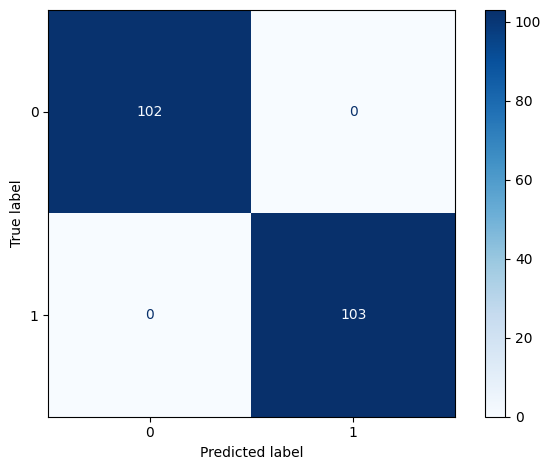


===== Evaluation Summary (Selected Features) =====
Selected Features: ['slope', 'chol', 'thalach', 'sex']
Accuracy: 1.0000
Confusion Matrix:
[[102   0]
 [  0 103]]
AUC: 1.0000


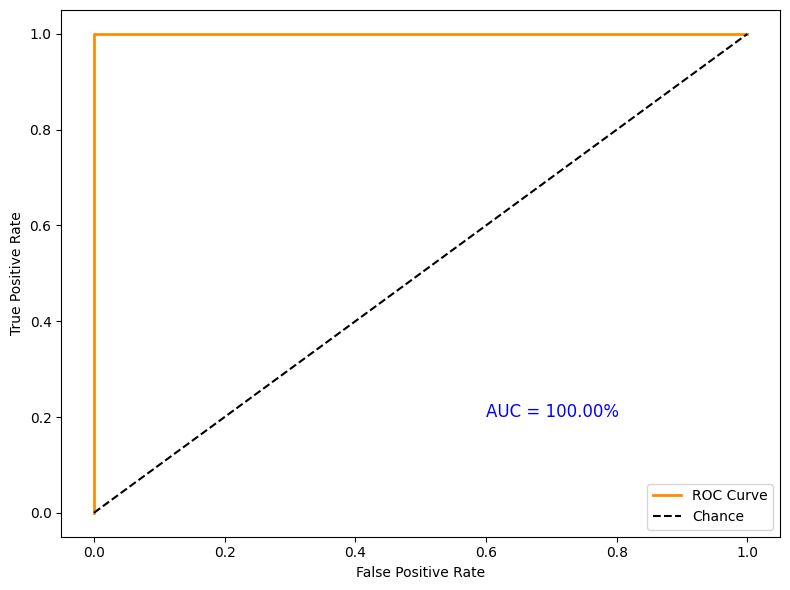

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  # Import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# --- Selected features manually defined ---
selected_features = ["slope", "chol", "thalach", "sex"]

# 1. Select features from the original DataFrame
X_sel = X[selected_features]

# 2. Split the selected features into training and testing sets
X_train_sel, X_test_sel, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, random_state=42)

# 3. Scale the selected feature subsets
scaler = StandardScaler()
X_train_sel_scaled = scaler.fit_transform(X_train_sel)
X_test_sel_scaled = scaler.transform(X_test_sel)

# 4. Train Random Forest on selected features
rf_sel = RandomForestClassifier(random_state=42)
rf_sel.fit(X_train_sel_scaled, y_train)
y_pred_sel = rf_sel.predict(X_test_sel_scaled)

# 5. Accuracy
accuracy = accuracy_score(y_test, y_pred_sel)

# 6. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_sel)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.tight_layout()
plt.savefig("confusion_matrix_selected_features.png", dpi=300)
plt.show()

# Print Confusion Matrix
print("\n===== Evaluation Summary (Selected Features) =====")
print(f"Selected Features: {selected_features}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(cm)

# 7. ROC & AUC
n_classes = len(np.unique(y))
if n_classes == 2:
    y_prob_sel = rf_sel.predict_proba(X_test_sel_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob_sel)
    roc_auc = auc(fpr, tpr)
    roc_auc_percent = roc_auc * 100

    # Print AUC
    print(f"AUC: {roc_auc:.4f}")

    # Plot ROC curve with AUC %
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.text(0.6, 0.2, f"AUC = {roc_auc_percent:.2f}%", fontsize=12, color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("roc_auc_selected_features.png", dpi=300)
    plt.show()

else:
    from sklearn.preprocessing import label_binarize

    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    y_score_sel = rf_sel.predict_proba(X_test_sel_scaled)

    fpr, tpr, roc_auc = {}, {}, {}
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score_sel[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f"Class {i} AUC = {roc_auc[i]*100:.2f}%")
        print(f"Class {i} AUC: {roc_auc[i]:.4f}")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multiclass ROC Curve - Selected Features")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("multiclass_roc_auc_selected_features.png", dpi=300)
    plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# For classification:
selector = SelectKBest(score_func=chi2, k=5)  # or f_classif
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features (SelectKBest):", selected_features.tolist())


Selected features (SelectKBest): ['cp', 'thalach', 'exang', 'oldpeak', 'ca']


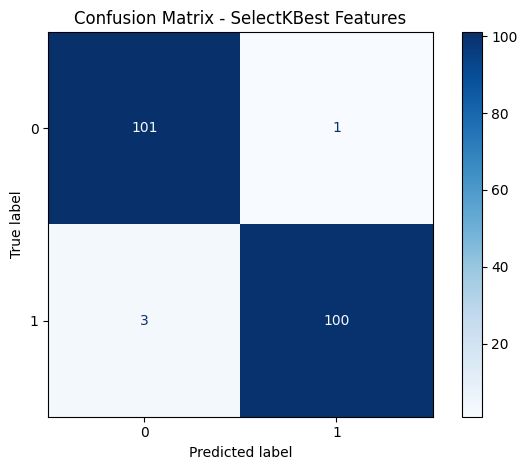

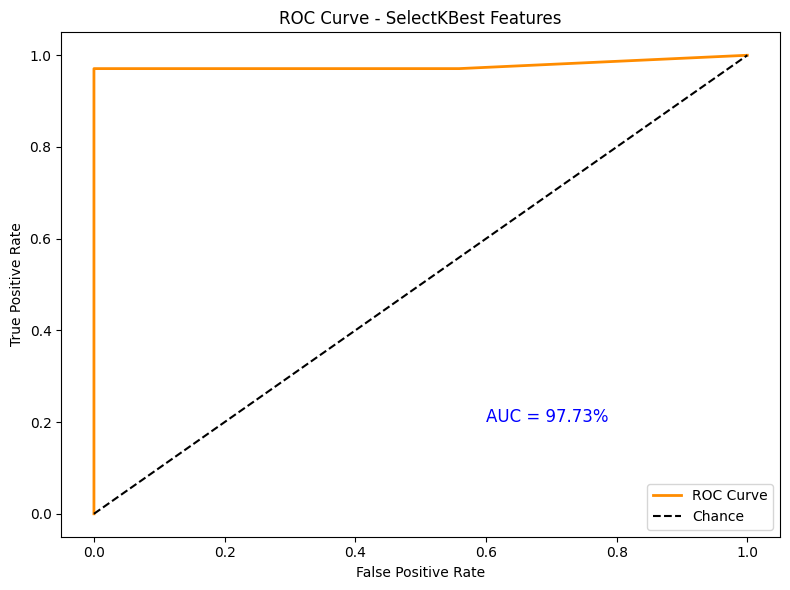

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2  # or f_classif



# Step 2: Split based on selected features
X_sel = X[selected_features]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sel)
X_test_scaled = scaler.transform(X_test_sel)

# Step 4: Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_sel)
y_pred = rf.predict(X_test_scaled)

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test_sel, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SelectKBest Features")
plt.tight_layout()
plt.savefig("confusion_matrix_selectkbest.png", dpi=300)
plt.show()

# Step 6: ROC Curve and AUC
n_classes = len(np.unique(y))
if n_classes == 2:
    y_prob = rf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test_sel, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.text(0.6, 0.2, f"AUC = {roc_auc * 100:.2f}%", fontsize=12, color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - SelectKBest Features")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("roc_auc_selectkbest.png", dpi=300)
    plt.show()

else:
    from sklearn.preprocessing import label_binarize

    y_test_bin = label_binarize(y_test_sel, classes=np.unique(y))
    y_score = rf.predict_proba(X_test_scaled)

    fpr, tpr, roc_auc = {}, {}, {}
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f"Class {i} AUC = {roc_auc[i]*100:.2f}%")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multiclass ROC Curve - SelectKBest Features")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig("multiclass_roc_auc_selectkbest.png", dpi=300)
    plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Step 2: Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Step 3: Predict and Evaluate
y_pred = rf.predict(X_test)

# Step 4: Accuracy and Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9804878048780488
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.99      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



In [ ]:
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Top features (Tree-based importance):\n", importance_df.head(10))


Top features (Tree-based importance):
      Feature  Importance
2         cp    0.136227
7    thalach    0.120346
11        ca    0.115941
12      thal    0.111888
9    oldpeak    0.107018
0        age    0.089344
4       chol    0.077712
3   trestbps    0.070218
8      exang    0.057470
10     slope    0.047324


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("Selected features (RFE):", selected_features.tolist())


Selected features (RFE): ['age', 'cp', 'thalach', 'oldpeak', 'ca']


Top features (Tree-based importance):
      Feature  Importance
2         cp    0.134201
7    thalach    0.120473
11        ca    0.116755
9    oldpeak    0.116151
12      thal    0.097043
0        age    0.089313
4       chol    0.078930
3   trestbps    0.074253
8      exang    0.059592
10     slope    0.048738

--- Random Forest Evaluation using Top 3 Tree-based Features ---
Accuracy: 0.9073
Confusion Matrix:
 [[98  4]
 [15 88]]


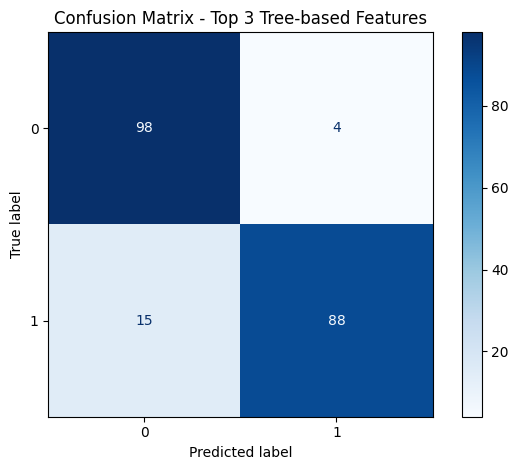

AUC: 0.9639


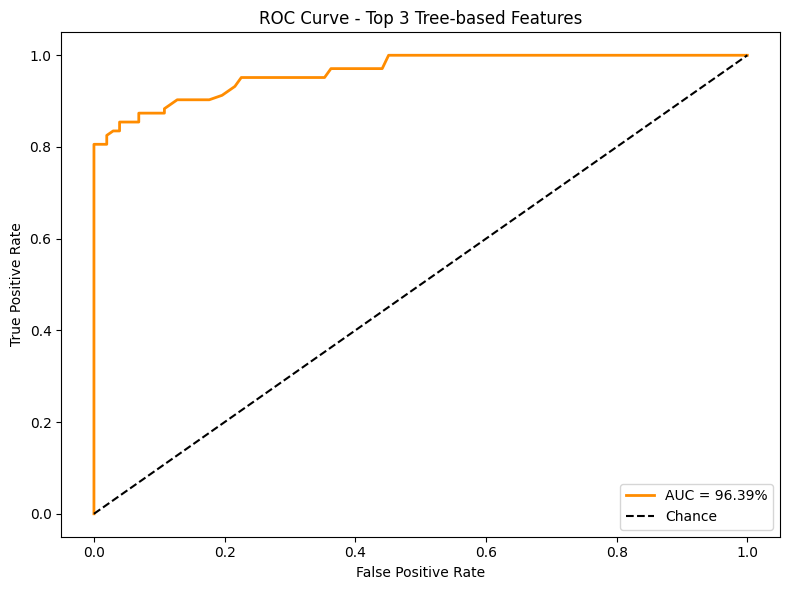


--- Random Forest Evaluation using Top 5 Tree-based Features ---
Accuracy: 0.9805
Confusion Matrix:
 [[101   1]
 [  3 100]]


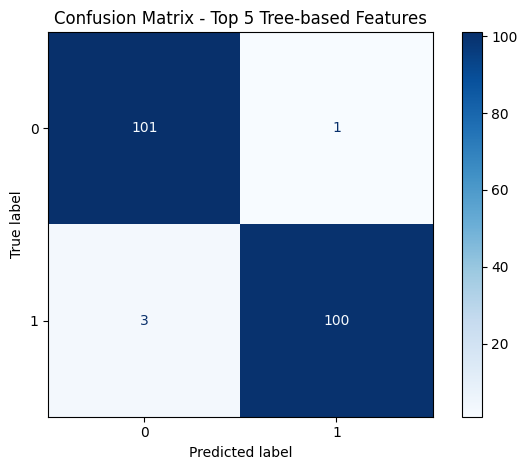

AUC: 0.9879


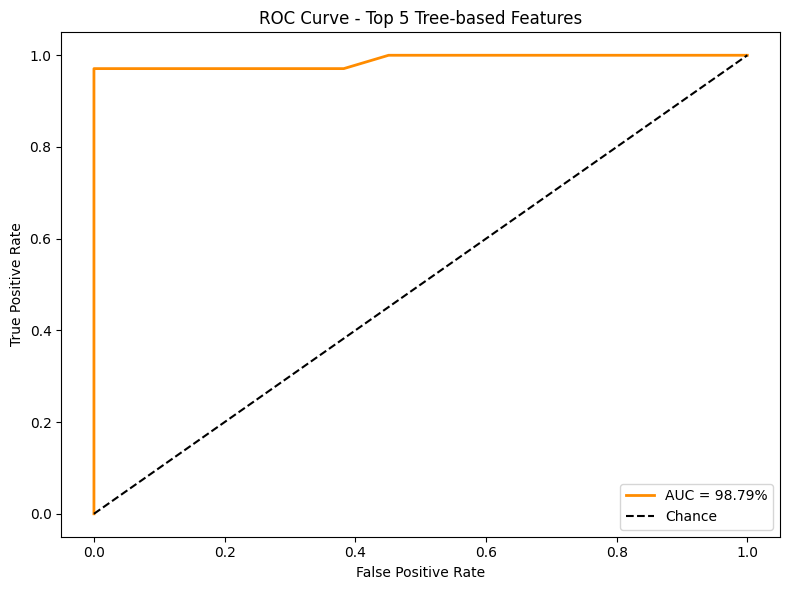

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Step 1: Fit Random Forest to get feature importances ---
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top features (Tree-based importance):\n", importance_df.head(10))

# --- Helper function to evaluate model ---
def evaluate_rf_with_features(selected_features, label):
    print(f"\n--- Random Forest Evaluation using {label} ---")

    X_sel = X[selected_features]
    X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y, test_size=0.2, random_state=42)

    # Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_sel)
    X_test_scaled = scaler.transform(X_test_sel)

    # Train RF
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train_scaled, y_train_sel)
    y_pred = rf.predict(X_test_scaled)
    y_prob = rf.predict_proba(X_test_scaled)[:, 1]

    # Accuracy
    acc = accuracy_score(y_test_sel, y_pred)
    print(f"Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test_sel, y_pred)
    print("Confusion Matrix:\n", cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {label}")
    plt.tight_layout()
    plt.savefig(f"confusion_matrix_{label.replace(' ', '_').lower()}.png", dpi=300)
    plt.show()

    # ROC & AUC
    fpr, tpr, _ = roc_curve(y_test_sel, y_prob)
    roc_auc = auc(fpr, tpr)
    print(f"AUC: {roc_auc:.4f}")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', linewidth=2, label=f'AUC = {roc_auc*100:.2f}%')
    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {label}")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.savefig(f"roc_auc_{label.replace(' ', '_').lower()}.png", dpi=300)
    plt.show()

# --- Step 2: Evaluate using Top 3 Features ---
top_3_features = importance_df['Feature'].head(3).tolist()
evaluate_rf_with_features(top_3_features, label="Top 3 Tree-based Features")

# --- Step 3: Evaluate using Top 5 Features ---
top_5_features = importance_df['Feature'].head(5).tolist()
evaluate_rf_with_features(top_5_features, label="Top 5 Tree-based Features")
